# Decision Tree

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

## Load dataset

In [2]:
diabetes = pd.read_csv("D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab9 - DT/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

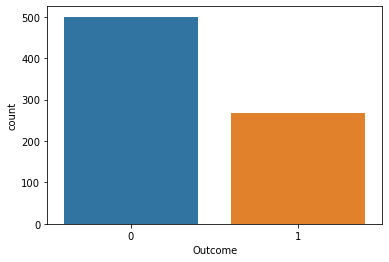

In [7]:
print(diabetes['Outcome'].value_counts())
sns.countplot(x= 'Outcome', data=diabetes)

## Feature Selection

In [8]:
# IV and TV
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = diabetes[feature_cols] 
y = diabetes.Outcome 

In [9]:
X.columns

Index(['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure',
       'DiabetesPedigreeFunction'],
      dtype='object')

In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Splitting Data

In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

## Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

conda install graphviz

conda install pydotplus

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

If the abve method does not fucntion properly, pls follow the following;

1 . Download and install graphviz-2.38.msi from
    https://graphviz.gitlab.io/_pages/Download/Download_windows.html

2 . Set the path variable
    (a) Control Panel > System and Security > System > Advanced System Settings > Environment Variables > Path > Edit
    (b) add 'C:\Program Files (x86)\Graphviz2.38\bin'

## DT - Basic

In [12]:
dtc = DecisionTreeClassifier().fit(X_train,y_train)
y_p = dtc.predict(X_test)

print(dtc.get_params())
# Model Accuracy
print("\nAccuracy:",metrics.accuracy_score(y_test, y_p).round(2))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}

Accuracy: 0.7


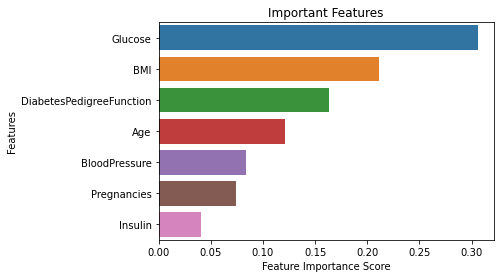

In [13]:
import matplotlib.pyplot as plt
feature_imp = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

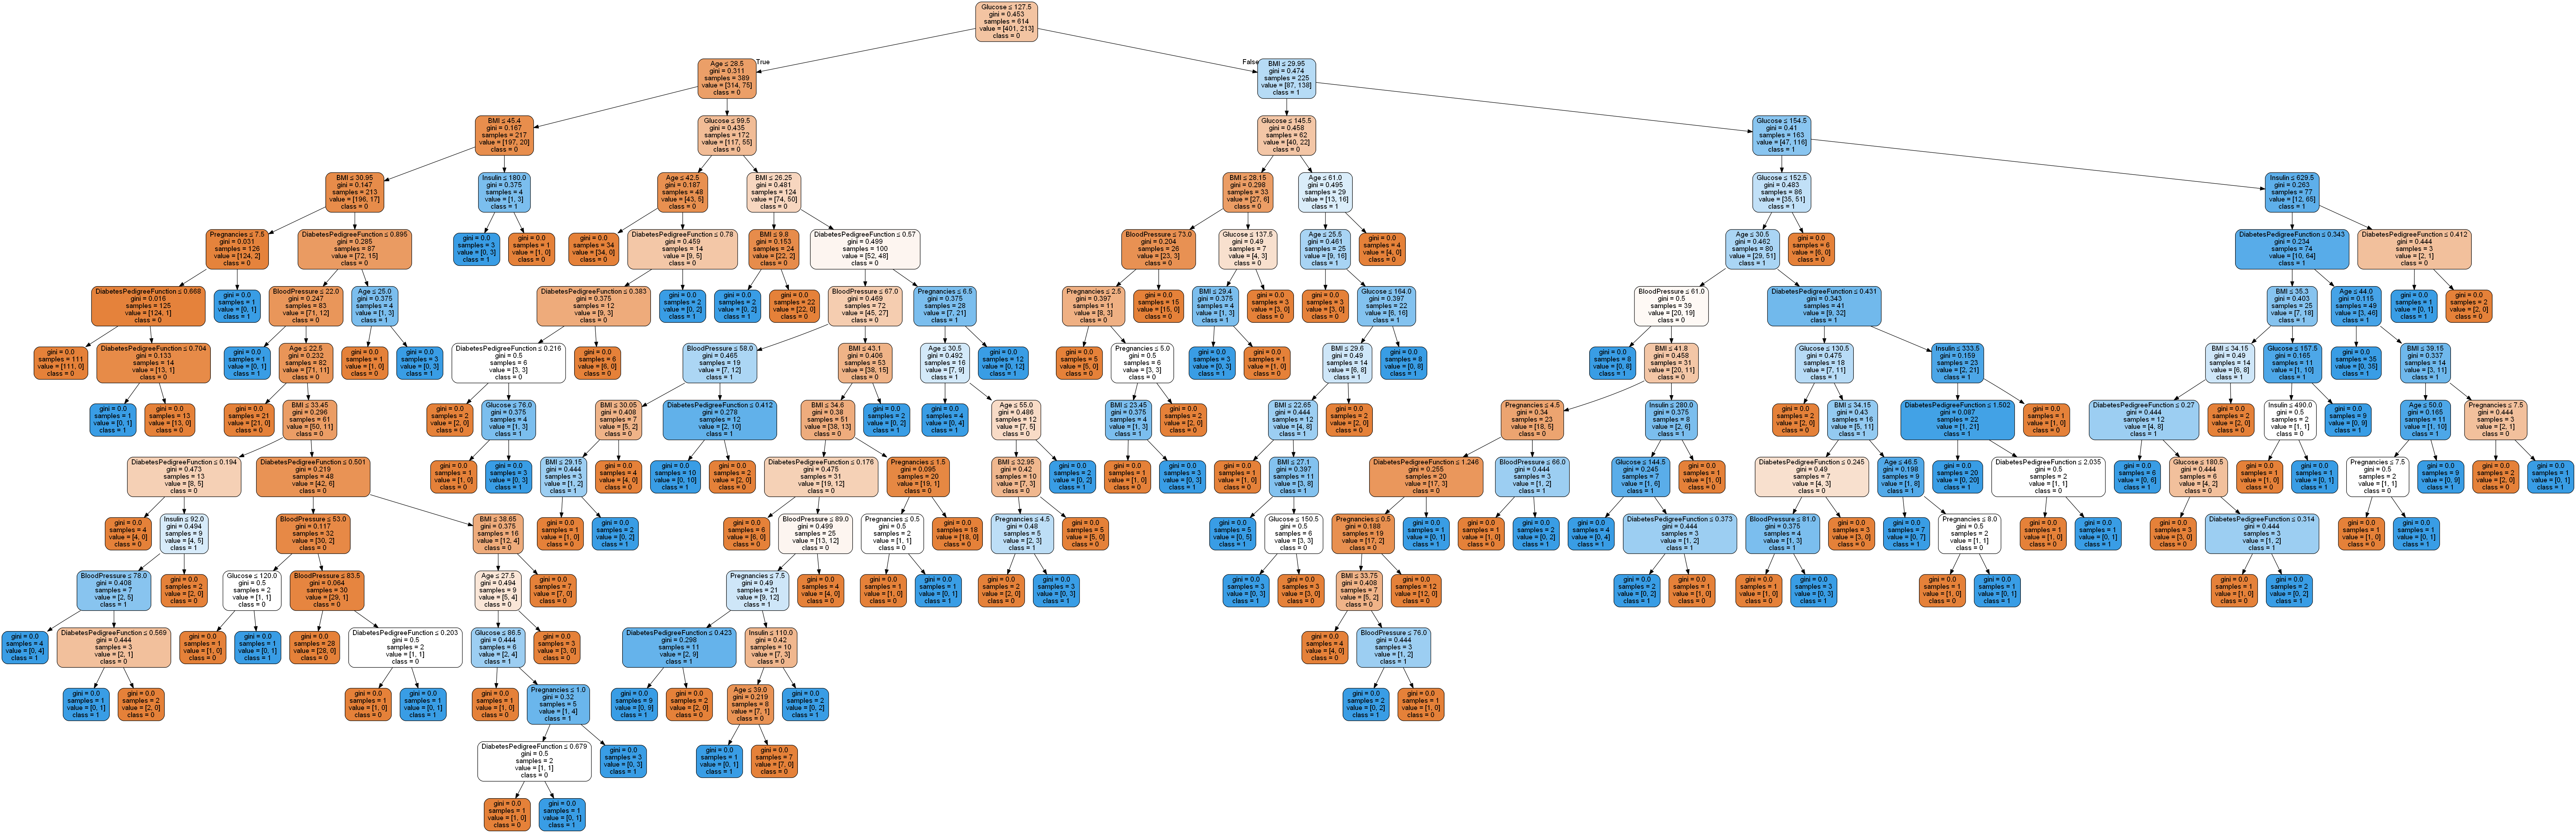

In [14]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab9 - DT/diabetes1.png')
Image(graph.create_png())

# Building Decision Tree Model

## DT with criterion = "entropy"

In [15]:
# Create Decision Tree classifer object
dtc2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtc2 = dtc2.fit(X_train,y_train)
y_pred = dtc2.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(2))

Accuracy: 0.8


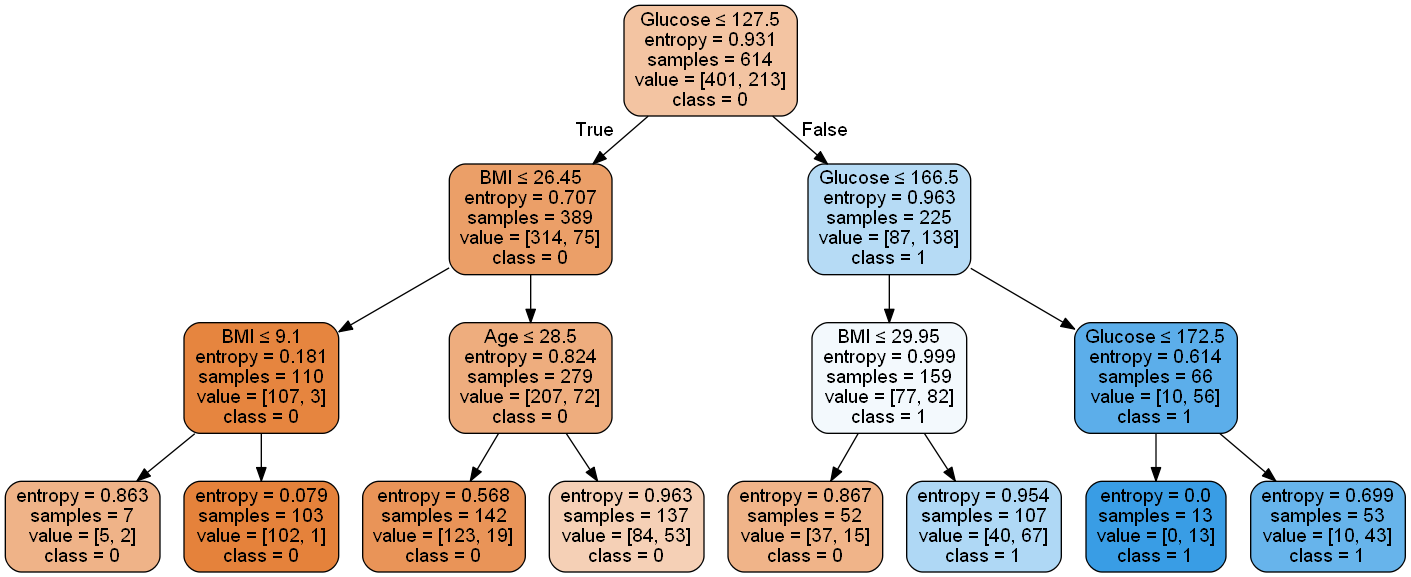

In [16]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab9 - DT/diabetes2.png')
Image(graph.create_png())

## DT with criterion = "gini" (default criterion)

In [17]:
# Create Decision Tree classifer object
dtc3 = DecisionTreeClassifier(criterion="gini", max_depth=3)
dtc3 = dtc3.fit(X_train,y_train)
y_pred = dtc3.predict(X_test)

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred).round(2))

Accuracy: 0.79


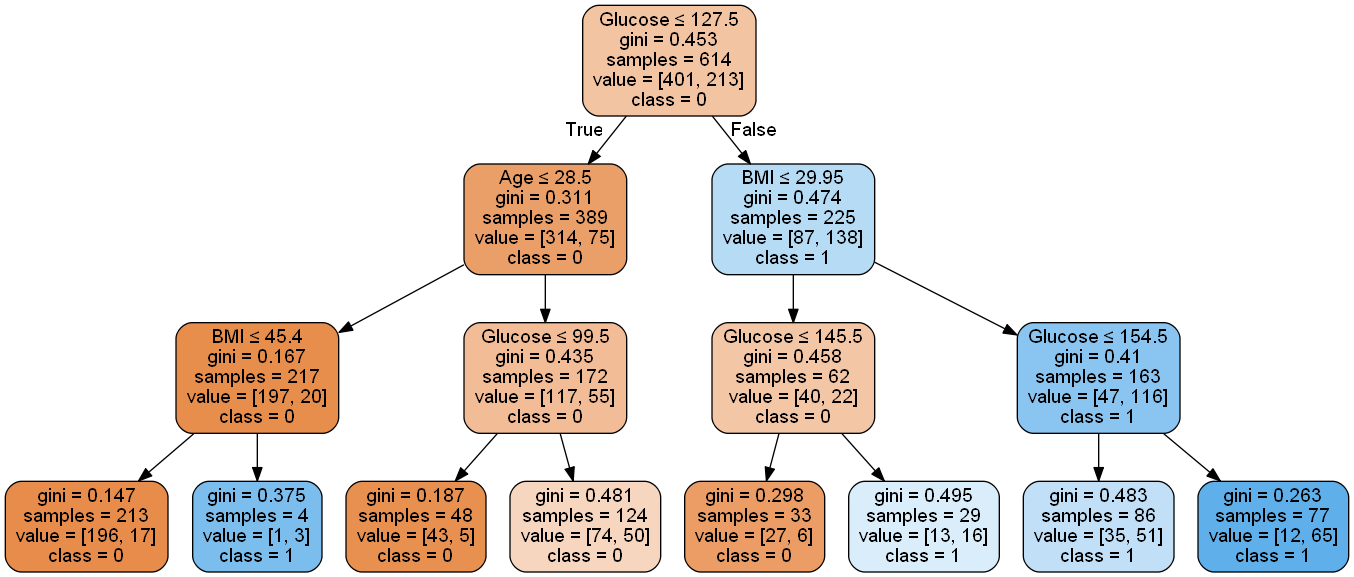

In [18]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab9 - DT/diabetes3.png')
Image(graph.create_png())

# Pros of DT

Decision trees are easy to interpret and visualize.

It can easily capture Non-linear patterns.

It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.

It can be used for feature engineering such as predicting missing values, suitable for variable selection.

The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)

# Cons of DT

Sensitive to noisy data. It can overfit noisy data.

The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.

Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

## Class Balancing

Counter({1: 500, 0: 500})


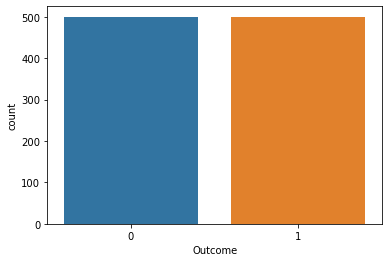

In [19]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X_b, y_b = SMOTE().fit_resample(X, y)
sns.countplot(x=y_b)
print(Counter(y_b))

In [20]:
# Split the dataset into a test and training set
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size=0.2, random_state=0)

## Grid Search CV with Class Balancing

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
dt = DecisionTreeClassifier()
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_search_dt = GridSearchCV(dt, parameters, scoring='accuracy', cv=5)

grid_search_dt.fit(X_train,y_train)
best_parameters_dt = grid_search_dt.best_params_  
best_score_dt = grid_search_dt.best_score_ 
print(best_parameters_dt)
print(best_score_dt)

y_pred_1 = grid_search_dt.predict(X_test)

# Get the accuracy score
dt_acc=accuracy_score(y_test, y_pred_1)*100
dt_pre=precision_score(y_test, y_pred_1, average='micro')
dt_recall=recall_score(y_test, y_pred_1, average='micro')
dt_f1_=f1_score(y_test, y_pred_1, average='micro')

print("DT - Accuracy: {:.3f}.".format(dt_acc))
print("DT - Precision: {:.3f}.".format(dt_pre))
print("DT - Recall: {:.3f}.".format(dt_recall))
print("DT - F1_Score: {:.3f}.".format(dt_f1_))

{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 100}
0.7537499999999999
DT - Accuracy: 76.500.
DT - Precision: 0.765.
DT - Recall: 0.765.
DT - F1_Score: 0.765.
